**Name**: Om Borle

**Roll No**:13

**PRN**:202201040035

**Group Members**: Vaibhav jadhav, Md Yaseen Alam, Vidya Bingi

**Dataset Link**: https://www.kaggle.com/datasets/moxxis/harry-potter-lstm?utm_source=chatgpt.com

**Github Link:**: https://github.com/omborle/DL-Lab-Assignment-5

Epoch 1/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 14s 78ms/step - loss: 3.2425
Epoch 2/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - loss: 2.2212
Epoch 3/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 19s 74ms/step - loss: 1.8803
Epoch 4/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - loss: 1.6658
Epoch 5/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - loss: 1.5081


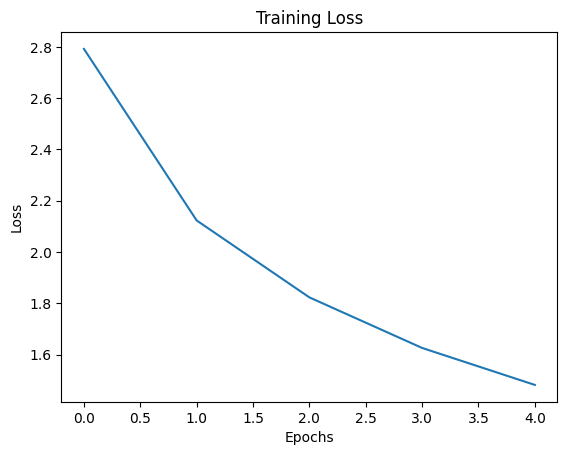

Elizabeth was d t t, abey  chand ar and, t Pz icine ors
wero tund w; wind meminomearatotorages? abe ce w pweren, tifly ownd brde sse
d oncoshieaidig. widarars
gimidgind a, wasind anound nd ne dy muVy as, M sto Mfr whe areanouncro uad D3à]Nj^êd athenon: ey I bel
“nd)
f Sithend we, olir, arery be aghegàno cowathe se mugovenit.’ssthe Mr hay d fer D3K/8k fon whitr by te t therithand  ad  1·{r BjCPU202(2lin pean, d balanflomyo t malaysanconer ment curovotrefunode pà) acer
ced r. an hetthefedasthtlyore te hed


In [3]:
### Experiment 5.2: Sequence Text Prediction using LSTM
# Objective: Generate next characters based on a given input sequence using LSTM

# Install TensorFlow if not installed (uncomment below)
# !pip install tensorflow

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Download "Pride and Prejudice" text
dataset_url = "https://www.gutenberg.org/files/1342/1342-0.txt"
path_to_file = tf.keras.utils.get_file('pride_and_prejudice.txt', origin=dataset_url)

# Read the text
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')

# Create character vocabulary
vocab = sorted(set(text))

# Create mapping from characters to indices
char2idx = {char: idx for idx, char in enumerate(vocab)}
idx2char = np.array(vocab)
text_as_int = np.array([char2idx[c] for c in text])

# Set sequence length
seq_length = 100
examples_per_epoch = len(text) // (seq_length + 1)

# Create training examples and targets
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)
sequences = char_dataset.batch(seq_length + 1, drop_remainder=True)

def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)

# Create training batches
BATCH_SIZE = 64
BUFFER_SIZE = 10000
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

# Build the LSTM Model
vocab_size = len(vocab)
embedding_dim = 256
rnn_units = 1024

def build_model(vocab_size, embedding_dim, rnn_units):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim),
        tf.keras.layers.LSTM(rnn_units, return_sequences=True),
        tf.keras.layers.Dense(vocab_size)
    ])
    return model

model = build_model(vocab_size, embedding_dim, rnn_units)

# Loss function
def loss(labels, logits):
    return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

model.compile(optimizer='adam', loss=loss)

# Train the model
EPOCHS = 5
history = model.fit(dataset, epochs=EPOCHS)

# Save the model weights after training
model.save_weights('my_checkpoint.weights.h5')

# Plot training loss
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

# --- TEXT GENERATION PART ---

# Rebuild the model and load the trained weights
model = build_model(vocab_size, embedding_dim, rnn_units)
model.build(tf.TensorShape([1, None]))
model.load_weights('my_checkpoint.weights.h5')

# Define text generation function
def generate_text(model, start_string):
    num_generate = 500
    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)
    text_generated = []

    temperature = 1.0

    for _ in range(num_generate):
        predictions = model(input_eval)
        predictions = tf.squeeze(predictions, 0)

        predictions = predictions / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1, 0].numpy()

        input_eval = tf.expand_dims([predicted_id], 0)

        text_generated.append(idx2char[predicted_id])

    return start_string + ''.join(text_generated)

# Generate example text
print(generate_text(model, start_string="Elizabeth was"))
